# NSL-KDD Veri Setinin Derinlemesine İncelenmesi: Saldırı Tespit Sistemlerine Yönelik Kapsamlı Bir Analiz

## Giriş

Günümüzde siber güvenlik, özellikle ağ tabanlı saldırıların tespit edilmesi (Intrusion Detection Systems - IDS) bağlamında, bilgi teknolojileri alanının en kritik çalışma konularından biri haline gelmiştir. IDS sistemlerinin performansını değerlendirmek ve yeni yöntemler geliştirmek amacıyla çeşitli veri setlerinden yararlanılmaktadır. Bu bağlamda, NSL-KDD veri seti, orijinal KDD Cup 1999 veri setindeki dengesizlikler ve tekrarlayan kayıtlar gibi sorunların giderilmesi amacıyla oluşturulmuş, daha dengeli ve güvenilir bir alternatif olarak öne çıkmıştır. NSL-KDD, ağ trafiği üzerindeki normal ve anormal davranışları temsil eden çeşitli veri örnekleri sunarak, saldırı tespit algoritmalarının geliştirilmesi ve doğrulanması için araştırmacılara kapsamlı bir kaynak sağlamaktadır.

Bu çalışmanın temel amacı, NSL-KDD veri seti üzerinde çeşitli makine öğrenmesi algoritmaları uygulanarak ağ saldırılarının etkin bir şekilde tespit edilmesini sağlamak, uygulanan yöntemlerin başarımları üzerinden kapsamlı bir karşılaştırmalı analiz gerçekleştirmek ve elde edilen bulgular doğrultusunda ağ güvenliği alanına katkı sunacak öneriler geliştirmektir. Çalışma sürecinde, veri ön işleme teknikleri kullanılarak veri setinin analize uygun hale getirilmesi sağlanmış; ardından farklı sınıflandırma algoritmaları ile deneyler yürütülerek, algoritmaların doğruluk, hata oranı ve işlem süresi gibi performans kriterleri değerlendirilmiştir.

Çalışmanın kapsamı şu temel adımlardan oluşmaktadır:

1. **Kütüphanelerin İmport Edilmesi:** Veri manipülasyonu, görselleştirme ve model geliştirme süreci için gerekli olan pandas, numpy, matplotlib, seaborn ve scikit-learn gibi Python kütüphaneleri projeye dahil edilmiştir.

2. **Veri Setinin Yüklenmesi:** NSL-KDD veri seti çalışma ortamına aktarılmış ve bu veri setinin analizi için temel yapı oluşturulmuştur.

3. **Veri Temizleme:** Eksik verilerin, aykırı değerlerin ve veri tutarsızlıklarının giderilmesi sağlanarak veri setinin kalitesi arttırılmıştır. Bu adım, verilerin doğruluğunu ve tutarlılığını sağlamak amacıyla önemlidir.

4. **Veri Dönüşümleri:** Bu bölümde, NSL-KDD veri setinde yer alan saldırı türleri, analiz ve modelleme sürecini kolaylaştırmak amacıyla daha genel kategorilere dönüştürülmüştür.Saldırı sınıflarının yeniden yapılandırılması, hem sınıflandırma probleminin karmaşıklığını azaltmış hem de sonuçların yorumlanabilirliğini artırmıştır.

5. **Keşifsel Veri Analizi (EDA) ve Görselleştirme:** Veri setindeki özelliklerin dağılımları, ilişkiler ve olası desenler analiz edilmiştir. Bu adım, ağ trafiği ve saldırı tipleri hakkında derinlemesine bilgi edinmeyi amaçlamaktadır.

6. **Ön İşleme:** Özelliklerin ölçeklendirilmesi, kategorik verilerin kodlanması ve uygun veri dönüşümleri gerçekleştirilmiştir. Bu işlem, makine öğrenmesi modellerinin doğru bir şekilde eğitilebilmesi için gereklidir.

7. **Özellik Mühendisliği:** Yeni özelliklerin oluşturulması, mevcut özelliklerin dönüşümü ve önemli bilgilerin çıkarılması işlemleriyle modelin doğruluğu artırılmıştır.

8. **Model İnşası:** 
   - **XGBoost (XGB):** Yüksek doğruluk oranları ve geniş veri setleri üzerinde gösterdiği başarı nedeniyle XGBoost algoritması tercih edilmiştir.
   - **Lojistik Regresyon:** Daha basit ve yorumlanabilir bir model olan Lojistik Regresyon, ağ saldırı tespitinin daha temel analizleri için kullanılmıştır.
9. **Model Değerlendirme:** Modellerin performansı, doğruluk, kesinlik, duyarlılık, F1-skoru ve ROC AUC gibi metrikler ile değerlendirilmiştir.

10. **Özellik Önem Analizi:** Hangi özelliklerin saldırı tespiti üzerinde daha belirleyici olduğunu ortaya koyarak, model yorumlanabilirliği artırılmıştır.

11. **Sonuçlar:** Farklı makine öğrenmesi modellerinin güçlü ve zayıf yönleri tartışılmış, ağ saldırı tespit sistemlerinin daha etkili hale getirilmesi için önerilerde bulunulmuştur.






# 1. KÜTÜPHANLERİN YÜKLENMESİ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df_0 = pd.read_csv("KDDTrain+.txt")
df= df_0.copy()

df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2. SÜTÜNLARIN AYARLANMASI

In [3]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 
           'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 
           'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 
           'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
           'num_access_files', 'num_outbound_cmds', 'is_host_login', 
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 
           'dst_host_srv_count', 'dst_host_same_srv_rate', 
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
           'dst_host_srv_rerror_rate', 'attack', 'level']

df.columns = columns

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.1 Analizler

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

# 3. VERİ TEMİZLEMESİ


# 3.1 Boş Değerler

In [6]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Veri setinde herhangi bir eksik (null) değer bulunmamaktadır.

In [7]:
#Detaylı analizler için kullanılan yardımcı fonksiyon
def unique_values(df, columns):
    """Veri çerçevesinde seçilen sütunlara ait benzersiz değerleri ve bunların sayım bilgilerini listelemektedir"""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [8]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

# 4.VERİ DÖNÜŞÜMLERİ


· Servis Dışı Bırakma Saldırıları(Bir sistemin ya da ağın normal işleyişini bozmak amacıyla yapılan saldırılardır.)
 **apache2,back**
 **,land**
 **,neptune**
 **,mailbomb**
 **,pod**
 **,processtable**
 **,smurf**
 **,teardrop**
 **,udpstorm**
 **,worm**

· Tarama saldırıları(Genellikle bir saldırganın hedef sistem hakkında bilgi toplamak amacıyla gerçekleştirdiği saldırılardır.)
 **ipsweep**
 **,mscan**
 **,nmap**
 **,portsweep**
 **,saint**
 **,satan**

· Yetki yükseltme saldırıları(Bir saldırganın, sistemdeki düşük yetkilerle başlayan erişimini, daha yüksek yetkilere sahip bir kullanıcı veya sistem yöneticisi seviyesine çıkarmak amacıyla gerçekleştirdiği saldırılardır. )
 **buffer_overflow**
 **,loadmodule**
 **,perl**
 **,ps**
 **,rootkit**
 **,sqlattack**
 **,xterm**

· Uzaktan erişim saldırılar(Bir saldırganın, hedef sisteme fiziksel olarak yakın olmadan, genellikle ağ üzerinden, yetkisiz bir şekilde erişim sağlamak amacıyla gerçekleştirdiği saldırılardır.)
 **,ftp_write**
 **,guess_passwd**
 **,http_tunnel**
 **,imap**
 **,multihop**
 **,named**
 **,phf**
 **,sendmail**
 **,snmpgetattack**
 **,snmpguess**
 **,spy**
 **,warezclient**
 **,warezmaster**
 **,xclock**
 **,xsnoop**
 

In [9]:
# Saldırı sınıflandırmalarımızı tutacak listeler
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [10]:
# Bunları aşağıda grafik çizmek için kullanacağız.
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [11]:
# Veri çerçevesi eşlemesi için geçirecek yardımcı fonksiyon
def map_attack(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in privilege_attacks:
        attack_type = 3
    elif attack in access_attacks:
        attack_type = 4
    else:
        attack_type = 0
        
    return attack_type


# 5. VERİ KEŞFİ VE GÖRSELLEŞTİRME

# 5.1 Protokol Tipi

Bu kod, 'attack' türlerinin 'protocol_type' bazında dağılımını görselleştirir. Seaborn kütüphanesi 
ile oluşturulan bar grafiği, her bir saldırı türü için farklı protokol türlerine
ait saldırı sayılarının karşılaştırılmasını sağlar. X eksenindeki etiketler döndürülüp, 
başlık eklenerek görselleştirme tamamlanır.

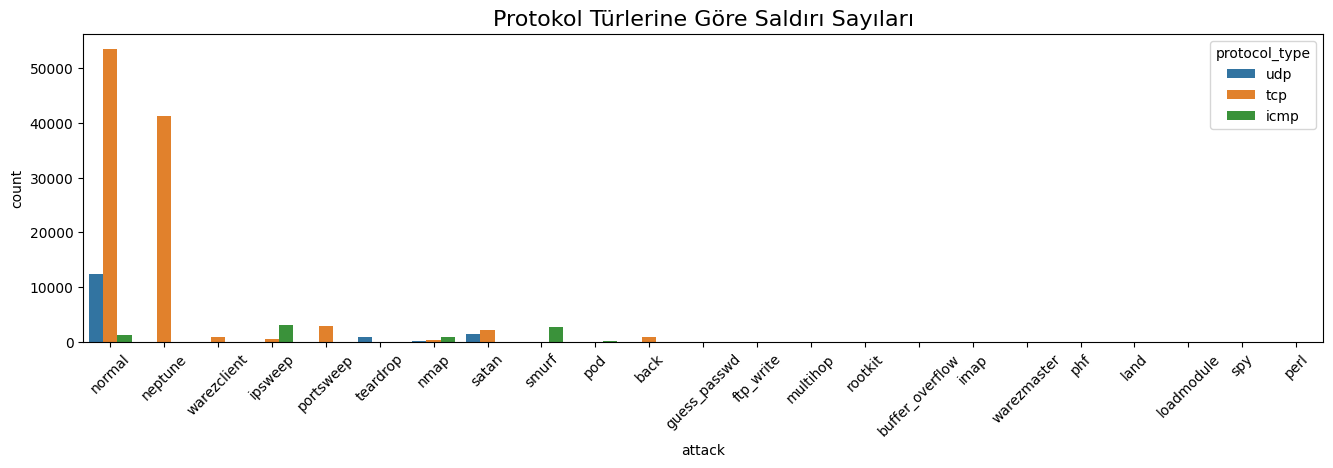

In [12]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Protokol Türlerine Göre Saldırı Sayıları',fontdict={'fontsize':16})
plt.show()

In [13]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

# 5.2 Kullanılan Hizmetin Saldırılar Üzerindeki Etkisi

Bu kod, 
  - 'service' sütununa göre farklı saldırı türlerinin dağılımını görselleştirir. 
  - Seaborn kütüphanesinin countplot fonksiyonu ile her bir hizmet türüne karşılık gelen saldırı sayıları 
    bar grafiğiyle gösterilir. 
  - 'attack' türlerine göre renkli gruplamalar yapılır.

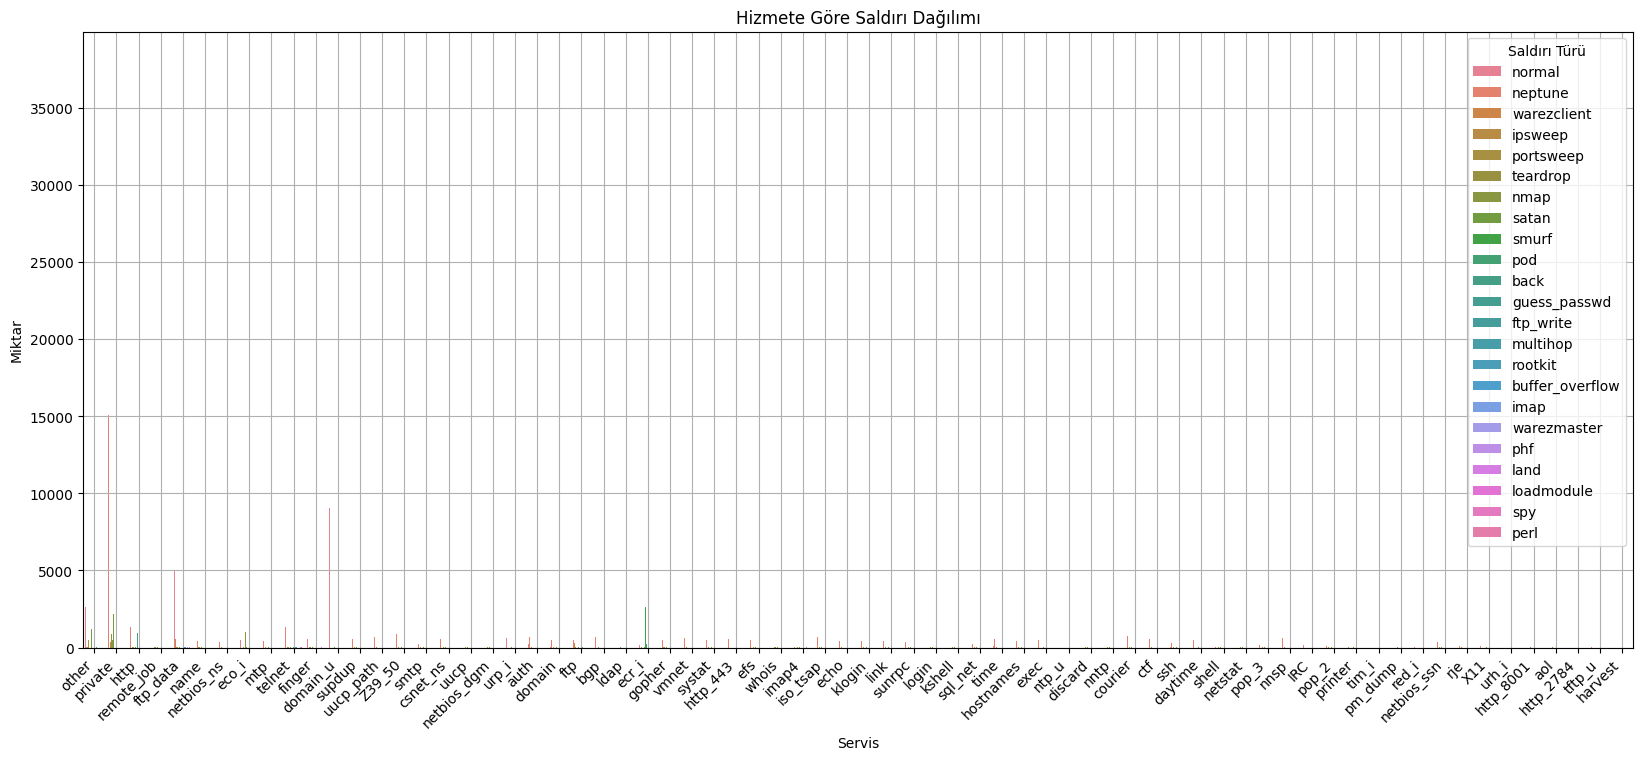

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8)) 
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Servis')
plt.ylabel('Miktar')
plt.title('Hizmete Göre Saldırı Dağılımı')
plt.legend(title='Saldırı Türü')
plt.grid(True)
plt.show()

# 5.3 Kullanılan Genel Hizmet

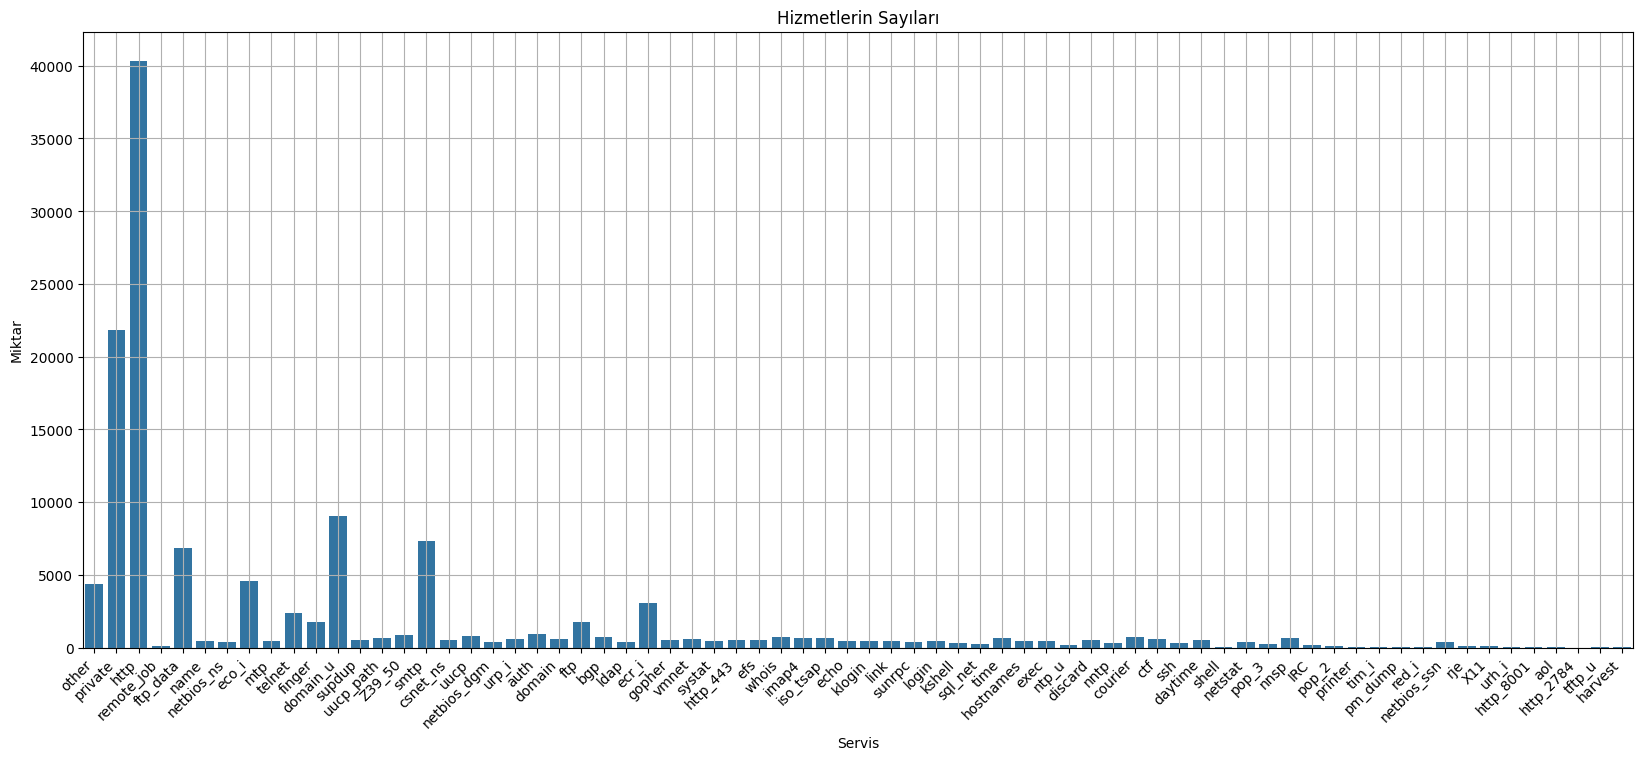

In [15]:
plt.figure(figsize=(20, 8))  
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  
plt.xlabel('Servis')
plt.ylabel('Miktar')
plt.title('Hizmetlerin Sayıları')
plt.grid(True)
plt.show()

# 5.4 Misafir Girişine Göre Saldırı Türlerinin Dağılımı

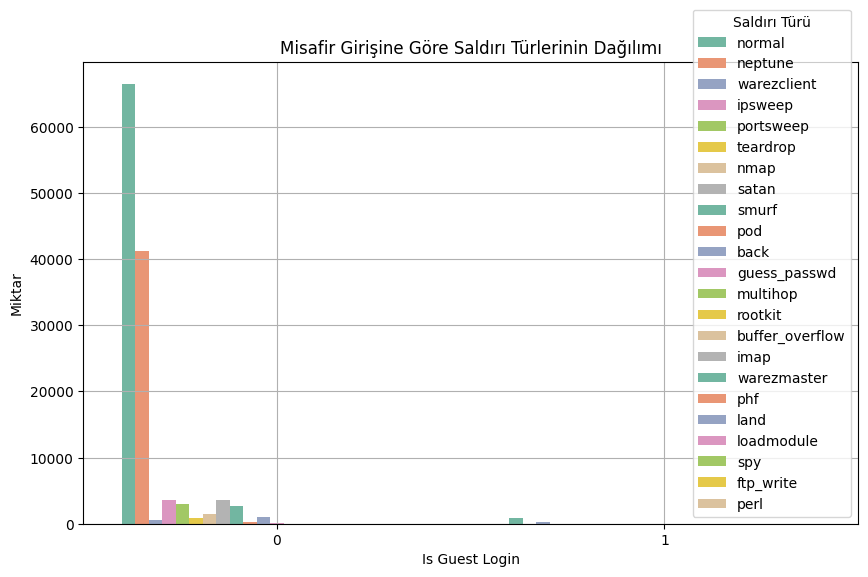

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Miktar')
plt.title('Misafir Girişine Göre Saldırı Türlerinin Dağılımı')
plt.legend(title='Saldırı Türü')
plt.grid(True)
plt.show()

Hoş geldiniz!
protocol_type    icmp    tcp    udp
attack                             
back                0    956      0
buffer_overflow     0     30      0
ftp_write           0      8      0
guess_passwd        0     53      0
imap                0     11      0
ipsweep          3117    482      0
land                0     18      0
loadmodule          0      9      0
multihop            0      7      0
neptune             0  41214      0
nmap              981    265    247
normal           1309  53599  12434
perl                0      3      0
phf                 0      4      0
pod               201      0      0
portsweep           5   2926      0
rootkit             0      7      3
satan              32   2184   1417
smurf            2646      0      0
spy                 0      2      0
teardrop            0      0    892
warezclient         0    890      0
warezmaster         0     20      0


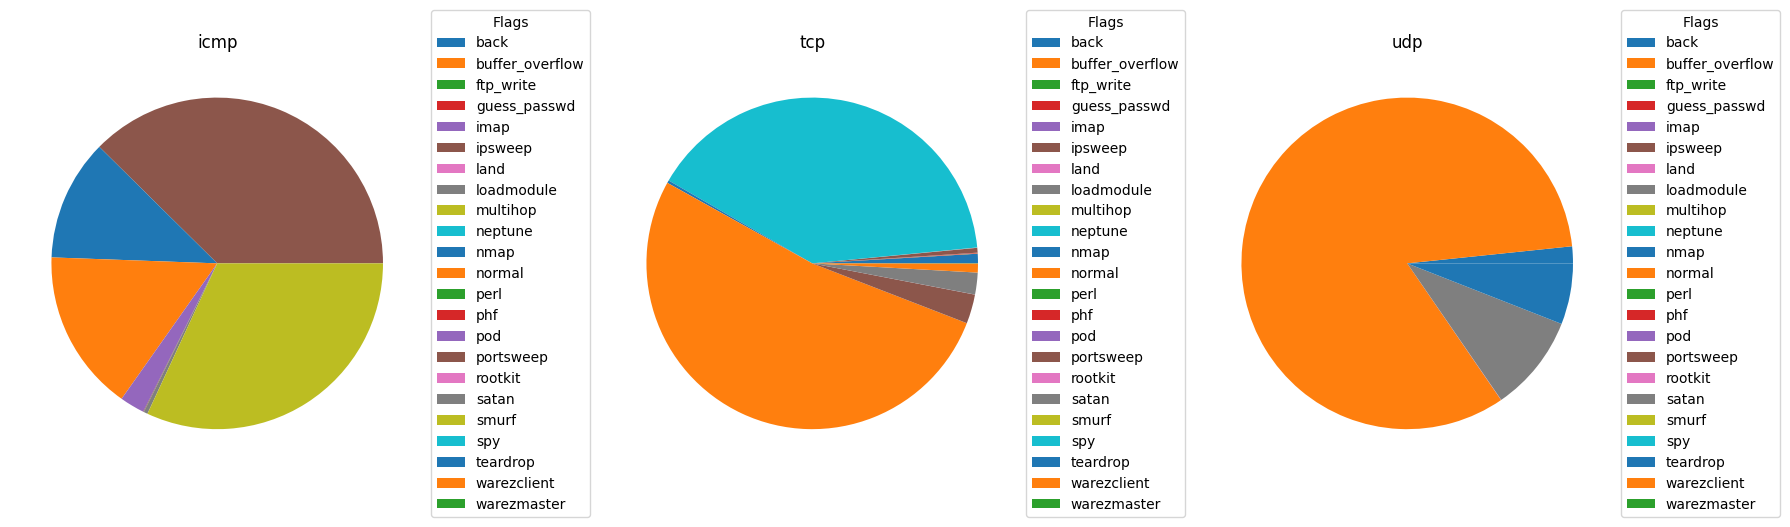

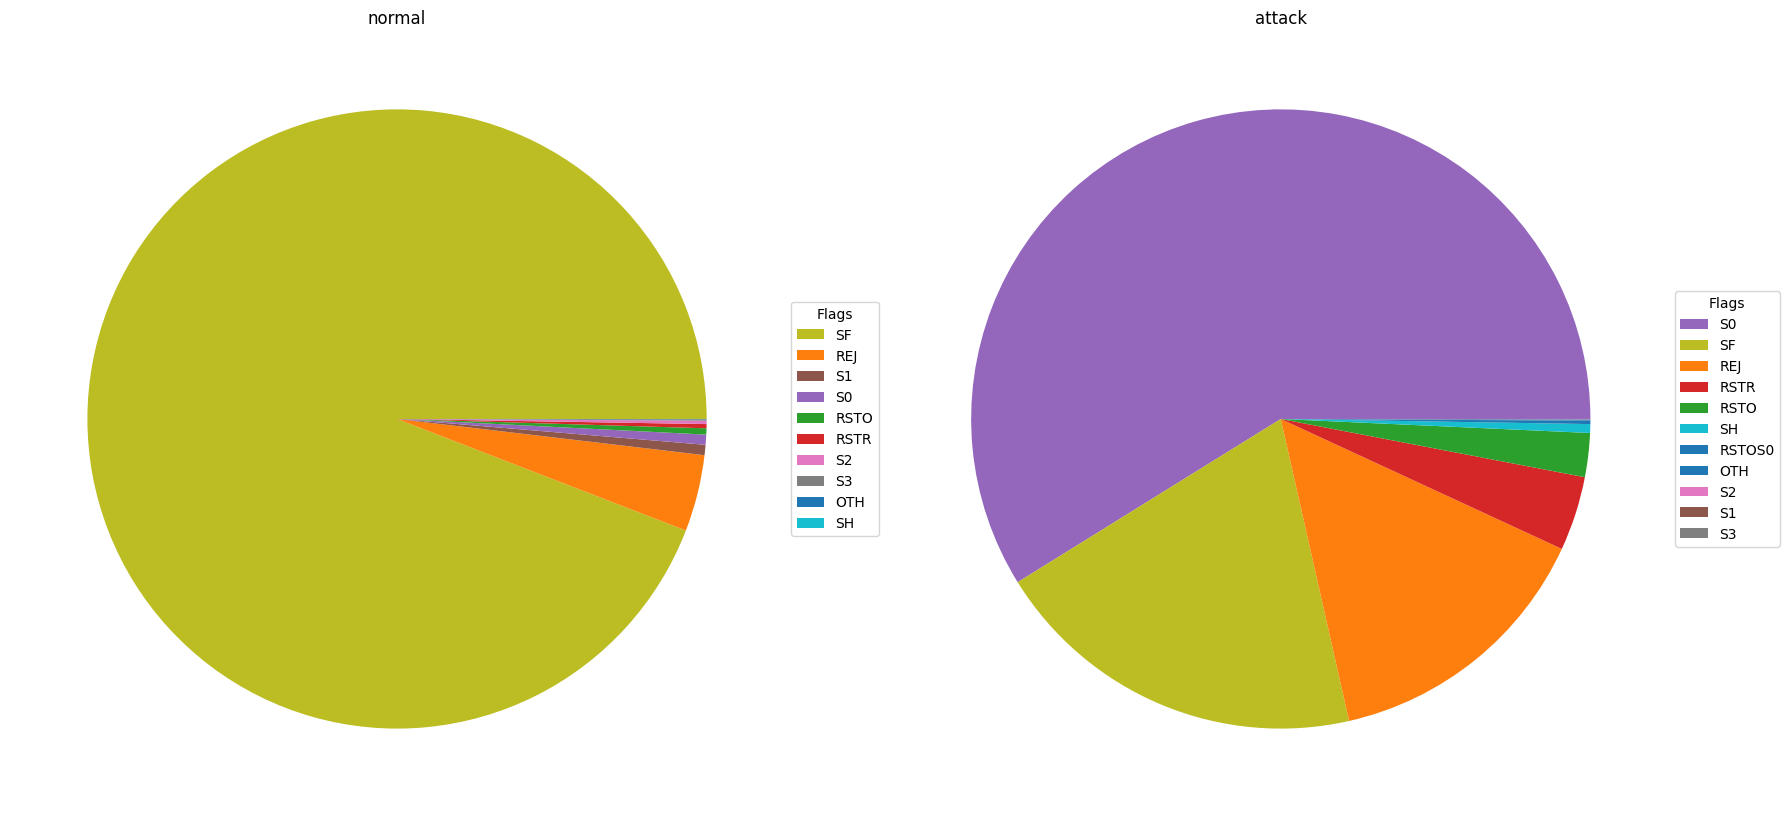

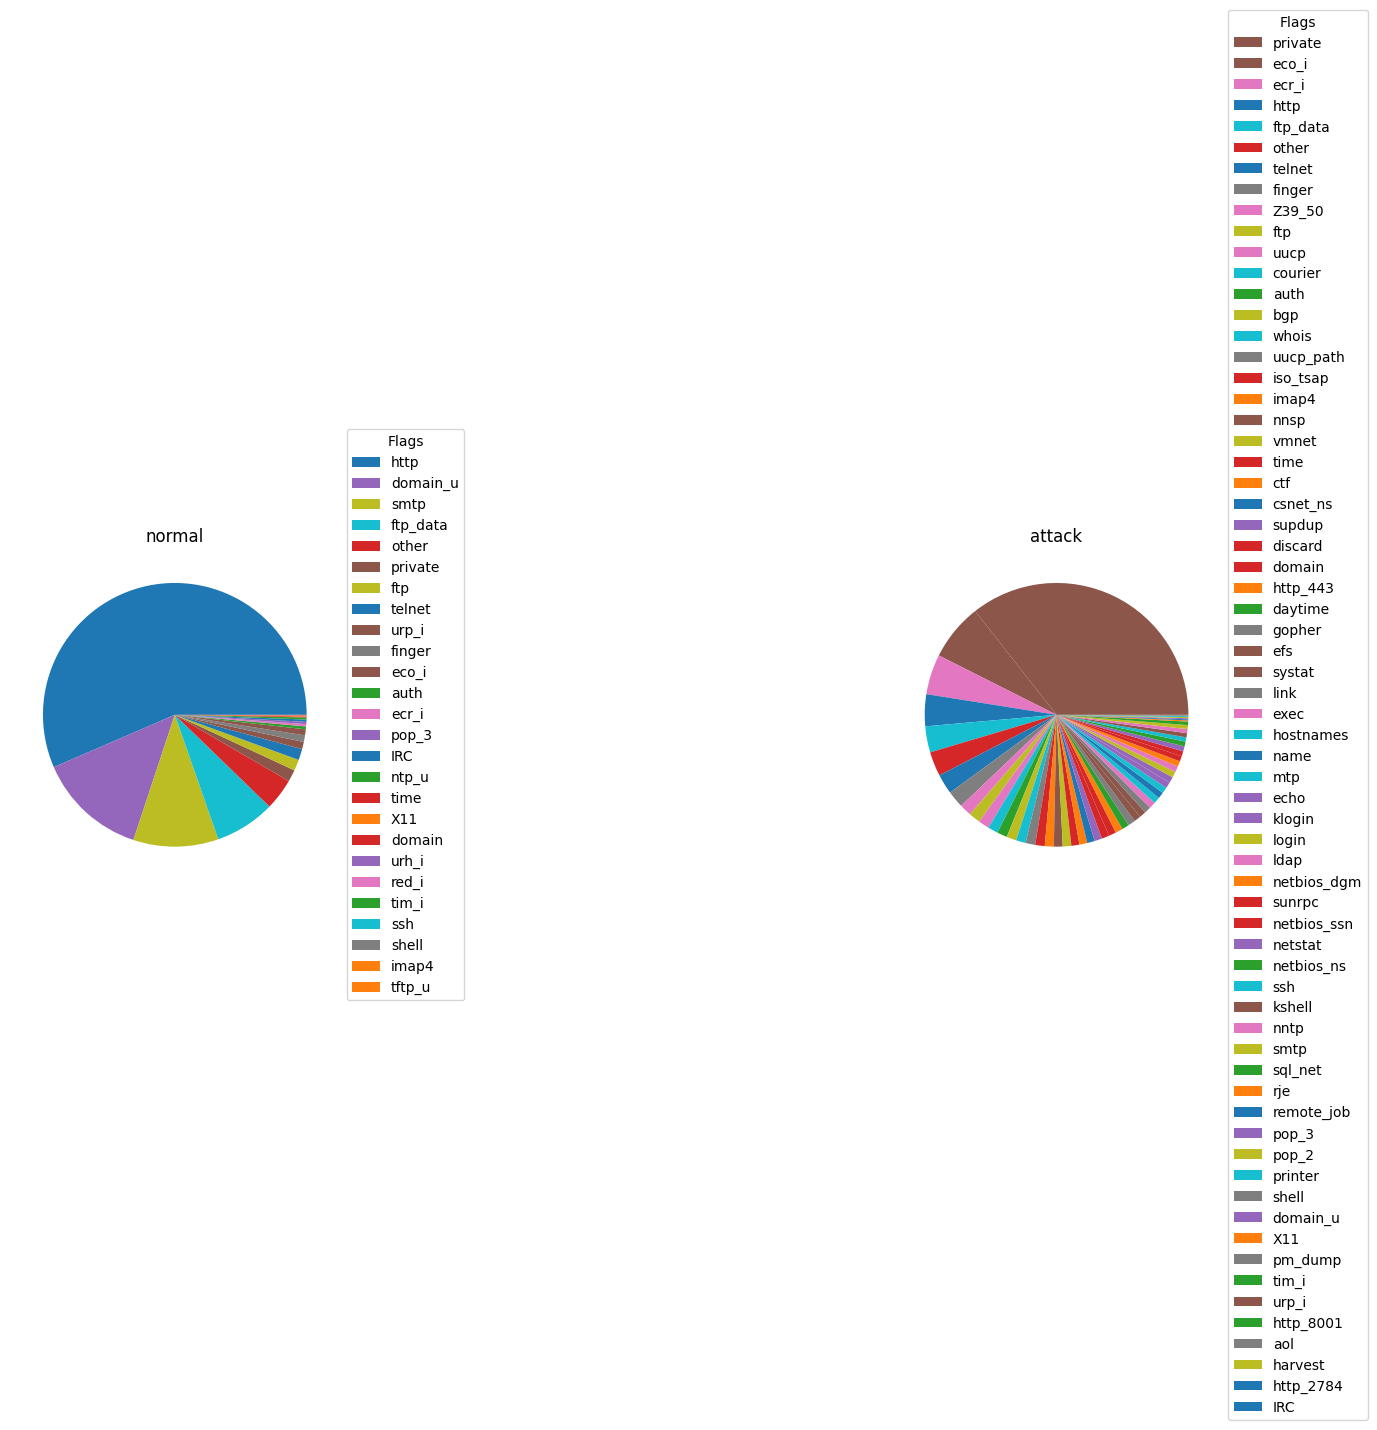

In [17]:
# NSL-KDD Veri Setini İnceleme
# Bu not defterinin amacı, NSL-KDD veri setine temel düzeyde bir bakış atmaktır.
# Bu keşfin amaçları:
# - Veri setini temel düzeyde tanımak
# - Ağa yönelik anormallikleri veya saldırıları tahmin etmede veri setinin nasıl kullanılabileceğini görmek
# - Makine öğrenmesi modelleri kurarken bazı temel kavramları gözden geçirmek
# NOT: Burada bazı işlemler elle yapılacak, çünkü amacımız ne yaptığımızı ve neden yaptığımızı daha iyi anlamak.
# Daha sonra, bu işlemleri sklearn ile daha verimli nasıl yapılır ona da bakacağız.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Hoş geldiniz!')

file_path_20_percent = '../input/nslkdd/KDDTrain+_20Percent.txt'
file_path_full_training_set = 'KDDTrain+.txt'
file_path_test = 'KDDTest+.txt' 

#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

df.columns = columns
test_df.columns = columns
df.head()

is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack',
                  'snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','Privilege','Access']

def map_attack(attack):
    if attack in dos_attacks:
        return 1
    elif attack in probe_attacks:
        return 2
    elif attack in privilege_attacks:
        return 3
    elif attack in access_attacks:
        return 4
    else:
        return 0

attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map
test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
print(attack_vs_protocol)

def bake_pies(data_list,labels):
    list_length = len(data_list)
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)

    for count, data_set in enumerate(data_list): 
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)

        wedges,texts = axs[count].pie(data_set, colors=[cdict[v] for v in data_set.index])
        axs[count].legend(wedges, data_set.index, title="Flags", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        axs[count].set_title(labels[count])

    return axs

icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])    
plt.show()

# 6. ÖN İŞLEME

In [18]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [19]:
# kategorik verileri sayılara dönüştürür.
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

# 6.1 Eğitim-Test Verisi Ayırma

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43) 

Bu kod:
 - Veri setini %90 eğitim verisi (X_train, y_train) ve 
 - 10 test verisi (X_test, y_test) olarak böler, 
 - böylece modelin eğitim ve değerlendirilmesi yapılabilir.

In [21]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'attack_flag', 'attack_map'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for protocol_type, flag, attack
label_encoders = {}
categorical_cols = ['protocol_type', 'flag', 'attack']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding for service (çok fazla kategori var, dikkatli olunmalı)
service_dummies = pd.get_dummies(df['service'], prefix='service')
df = pd.concat([df, service_dummies], axis=1)
df.drop('service', axis=1, inplace=True)

# 7. ÖZELLİK MÜHENDİSLİĞİ

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

attack_map                    0.969
src_bytes                     0.931
service                       0.762
attack_flag                   0.701
flag                          0.675
diff_srv_rate                 0.658
same_srv_rate                 0.622
dst_host_diff_srv_rate        0.613
dst_host_same_srv_rate        0.564
count                         0.563
dst_host_srv_count            0.542
dst_bytes                     0.503
dst_host_serror_rate          0.499
serror_rate                   0.474
dst_host_srv_serror_rate      0.447
srv_serror_rate               0.425
dst_host_same_src_port_rate   0.387
level                         0.365
logged_in                     0.355
dst_host_srv_diff_host_rate   0.327
dst_host_count                0.296
srv_count                     0.294
protocol_type                 0.259
dst_host_rerror_rate          0.206
srv_diff_host_rate            0.187
dst_host_srv_rerror_rate      0.157
rerror_rate                   0.150
srv_rerror_rate             

# 7.1 Özellik Seçimi

In [24]:
# Bu kod, en iyi 30 özelliği seçer ve isimlerini belirler.
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'attack_flag', 'attack_map'],
      dtype='object')

Bu kod, 
  - X_train ve X_test verilerini standardize eder (ölçeklendirir). 
  - Eğitim verisi, ortalama ve standart sapma ile dönüştürülürken, 
  - test verisi yalnızca eğitim verisinden elde edilen parametrelerle dönüştürülür, 
böylece test verisinde bilgi sızıntısı önlenir.

In [25]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']
#Veri kümesi yeterince büyük olduğundan, modelimizi en iyi 15 özellik ile sürdüreceğiz

X_train=X_train[columns]
X_test=X_test[columns]

# 7.2 Ölçeklendirme(Standardizasyon)

Bu kod, 
  - X_train ve X_test verilerini standardize eder (ölçeklendirir). 
  - Eğitim verisi, ortalama ve standart sapma ile dönüştürülürken, 
  - test verisi yalnızca eğitim verisinden elde edilen parametrelerle dönüştürülür, 
böylece test verisinde bilgi sızıntısı önlenir.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # veri sızıntısını önlemek için yalnızca dönüşümü kullanıyoruz

# 8. MODEL İNŞASI

In [27]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [28]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [29]:
XGBoost = XGBoost_model.fit(X_train,y_train) # XGBoost modeli eğitim verileriyle eğitildi

In [30]:
Logistic = Logistic_model.fit(X_train,y_train) ## Lojistik Regresyon modeli eğitim verileriyle eğitildi

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [32]:
#Modelimizin aşırı uyum ya da yetersiz uyum olup olmadığını değerlendirmek için kullanılan bir yardımcı fonksiyondur.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [33]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[   3    0    0    0    0    0    0  105    0    0    0    0    0    0
     0    0]
 [   0    1    0    0    0    0    0    2    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    1    1    0    0    0    0    0    0
     0    0]
 [   0    0    0  331    0    0    0   41    0    0    2    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0 4065    0    2    0    0    4    2    0    0
     0    0]
 [   0    0    0   96    0    0   30   21    0    0    0    0    0    0
     0    0]
 [   9    0    0   87    0   11    5 6641    0    0    6    3    0    0
     8    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0   24    0    0    0    0
     0    0]
 [   0    1    0    0    0   21    0   43    0    0  213   12    0    0
     0    0]
 [   1    1    0    2    0   45    0   87    0    0    9

In [34]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 108    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0  371    0    0    0    0    3    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0 4068    0    3    0    0    2    0
     0    0    0    0    0]
 [   0    0    0    0   96    0    0    0   50    1    0    0    0    0
     0    0    0    0    0]
 [   0    1    0    0    1    1    0    0    1 6761    0    0    1    2
     1    0    0   

Yani xgboost,adaboost,gradientboosts gibi topluluk yöntemlerinin daha büyük veri kümelerinde lojistik regresyona göre daha fazla doğruluk puanına sahip olduğunu görebiliriz.

Gerekli değil ancak modeli en iyi parametrelerle uydurmak için hiperparametre ayarlaması yapacağız, xgboost'un çapraz doğrulamasının kendi kendine olduğunu hatırlatmak isterim.

In [35]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("\nXGBoost:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Model değerlendirme
y_pred = xgb.predict(X_test)
print("\nXGBoost Performans Metrikleri:")
print(classification_report(y_test, y_pred))
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))


XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         3
           4       1.00      0.50      0.67         2
           5       0.78      0.99      0.87       374
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      4073
          10       0.98      0.34      0.51       147
          11       1.00      1.00      1.00      6770
          12       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        24
          15       0.99      0.96      0.98       290
          16       0.00      0.00      0.00         0
          17       0.99      0.99      0.99       365
          18       1.00      1.00      1.00       251
          20       1.00      1.00      1.00        87
          21     

# 8.1 Lojistik Regresyon

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Veriyi ayırma
X = df.drop(['attack', 'level'], axis=1)
y = df['attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lojistik Regresyon
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Model değerlendirme
y_pred = lr.predict(X_test)
print("\nLojistik Regresyon Performans Metrikleri:")
print(classification_report(y_test, y_pred))
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       305
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00      1105
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.78      1.00      0.87     12470
          10       0.00      0.00      0.00       445
          11       0.87      0.92      0.90     20014
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        57
          15       0.60      0.29      0.39       854
          16       0.00      0.00      0.00         4
      

# 8.2 Hiperparametre Ayarı

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np


In [38]:
XGB_model = XGBClassifier(random_state=42, tree_method='hist', use_label_encoder=False, eval_metric='logloss')

In [39]:
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score, zero_division=1)

In [40]:
param_dist = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1], 
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 100, 150],
    'subsample': [0.5, 0.6, 0.8],
    'colsample_bytree': [0.5, 0.6, 0.8],
    'gamma': [0, 0.1, 0.2], 
    'min_child_weight': [1, 3],  
    'scale_pos_weight': [1, 5]  
}

In [41]:

estimator = XGBClassifier(
    early_stopping_rounds=10,
    eval_metric='logloss',
    use_label_encoder=False  
)

In [42]:
print(f"Gerçek veri seti boyutu: {X_train.shape[0]} örnek")


Gerçek veri seti boyutu: 88180 örnek


In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# XGBClassifier modelini başlat
XGB_model = XGBClassifier(random_state=42)

# Parametre alanını daraltarak tanımla
param_grid = {
    'max_depth': [3, 5],  # Derinliği küçült
    'n_estimators': [50, 100],  # Ağaç sayısını sınırlı tut
    'learning_rate': [0.01, 0.05, 0.1]  # Öğrenme hızını az tut
}

# GridSearchCV başlat (Erken durdurma eklemedik, sadece temel parametrelerle çalışıyoruz)
XGB_grid_model = GridSearchCV(XGB_model, 
                              param_grid, 
                              scoring="f1", 
                              n_jobs=-1,  # Tüm işlemcileri kullan
                              return_train_score=True, 
                              cv=3,  # 3 katlı çapraz doğrulama
                              verbose=1)  # Çalışma sürecini görmek için

# Eğitim işlemini başlat
XGB_grid_model.fit(X_train, y_train)

# En iyi parametreleri ve model skorunu göster
print("En iyi parametreler:", XGB_grid_model.best_params_)

# Gerçek veri setinin boyutunu yazdır
print(f"Gerçek veri seti boyutu: {X_train.shape[0]} örnek")

XGB_grid_model = GridSearchCV(XGB_model, param_grid, scoring="accuracy", n_jobs=-1, return_train_score=True)
XGB_grid_model.fit(X_train, y_train)

# En iyi F1 skoru
print(f"En iyi F1 skoru: {XGB_grid_model.best_score_}")
print(f"En iyi parametreler: {XGB_grid_model.best_params_}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Gerçek veri seti boyutu: 88180 örnek
En iyi F1 skoru: nan
En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [44]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #modeli başlat

XGB_grid_model = GridSearchCV(XGB_model, # Hangi model optimize edilecek
                        param_grid,      # Denenecek parametreler 
                        scoring="f1",    # Denenecek parametreler 
                        n_jobs=-1,       # Tüm işlemcileri kullan (daha hızlı çalışmasını sağlar.)
                        return_train_score=True).fit(X_train, y_train) # Eğitim skorlarını da döndür ve eğitimi başlat

In [45]:
XGB_grid_model.best_score_ # En iyi modelin elde ettiği en yüksek F1 skoru

np.float64(nan)

In [46]:
XGB_grid_model.best_params_ # En iyi sonucu veren XGBoost modelinin hiperparametre ayarları

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

# 8.3 Nihai Model

In [47]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,   # Her ağaç için kullanılacak özellik oranı
    learning_rate=0.1,      # Modelin öğrenme hızı
    max_depth=6,            # Her ağacın maksimum derinliği
    n_estimators=128,       # Toplam ağaç sayısı
    subsample=0.8           # Her ağaç için kullanılacak veri oranı

)


# Sınıflandırıcıyı verilerinize uydurun
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=128,
              n_jobs=None, num_parallel_tree=None, ...)

# 9. MODEL DEĞERLENDİRMESİ

In [48]:
lb = LabelBinarizer()
lb.fit(XGB_model.classes_)  # HATA: Modelin çıkardığı sınıf sayısına göre ayar
y_test_bin = lb.transform(y_test)


NameError: name 'LabelBinarizer' is not defined

In [ ]:
import numpy as np

print("Gerçek sınıf çeşitleri:", np.unique(y_test))
print("Modelin sınıfları:", XGB_model.classes_)
print("y_test_bin shape:", y_test_bin.shape)
print("y_pred_proba shape:", y_pred_proba.shape)


Gerçek sınıf çeşitleri: [ 0  3  4  5  7  9 10 11 12 14 15 17 18 20 21 22]
Modelin sınıfları: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
y_test_bin shape: (12598, 23)
y_pred_proba shape: (12598, 23)


In [ ]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# --- Tahminler ---
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

# --- F1 ve Recall (macro ortalama) ---
xgb_f1 = f1_score(y_test, y_pred, average='macro')
xgb_recall = recall_score(y_test, y_pred, average='macro')

# --- AUC için: Sadece testte bulunan sınıfları dikkate al ---
present_classes = np.unique(y_test)

# y_test'i one-hot encode et (yalnızca testteki sınıflarla)
y_test_bin = label_binarize(y_test, classes=present_classes)

# modelin tahmin olasılıklarından sadece mevcut sınıfları seç
class_indices = [np.where(XGB_model.classes_ == cls)[0][0] for cls in present_classes]
y_pred_proba_filtered = y_pred_proba[:, class_indices]

# AUC skorunu hesapla (macro ortalama, multi-class OVR)
xgb_auc = roc_auc_score(y_test_bin, y_pred_proba_filtered, multi_class='ovr', average='macro')

# --- Sonuçları yazdır ---
print(f"F1 Score (macro): {xgb_f1}")
print(f"Recall (macro): {xgb_recall}")
print(f"AUC Score (macro): {xgb_auc}")


F1 Score (macro): 0.8148148148148148
Recall (macro): 0.8055555555555556
AUC Score (macro): 0.9999950385012304


In [ ]:
xgb_auc # Modelin ROC AUC skoru hesaplanıyor

np.float64(0.9999950385012304)

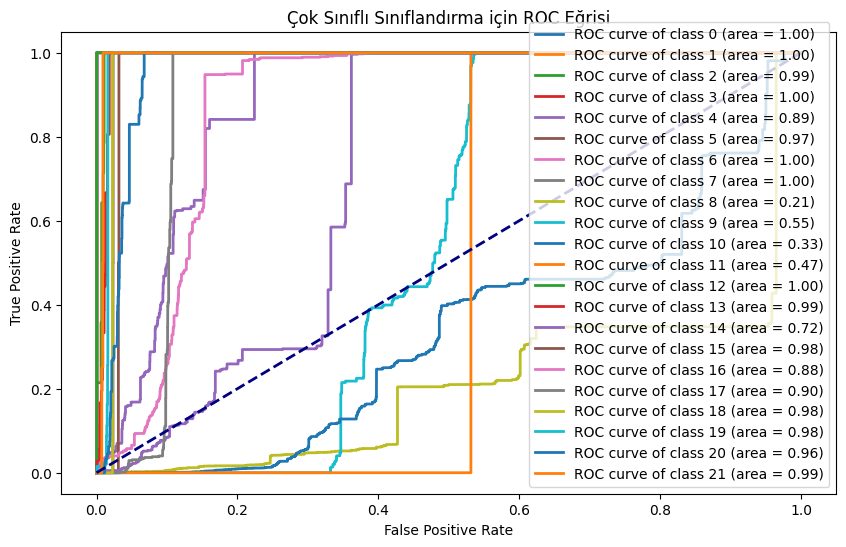

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Çok sınıflı ROC için çıktı etiketlerini ikili hale getirin
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Her sınıf için tahmini olasılıkları alın
y_pred_prob = XGB_model.predict_proba(X_test)

# Sınıf sayısı
n_classes = y_test_bin.shape[1]

# Her sınıf için ROC eğrisini çizin
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm ROC eğrilerini çiz
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Çok Sınıflı Sınıflandırma için ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# # XGBoost modelinin ROC eğrisini çiziyor

# from sklearn.metrics import RocCurveDisplay

# RocCurveDisplay.from_estimator(XGB_model, X_test, y_test)

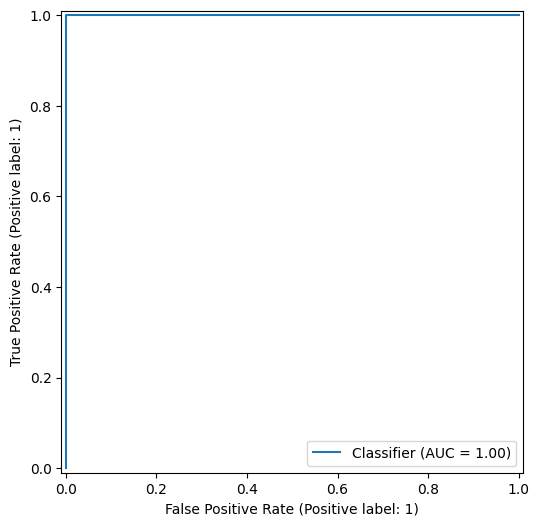

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Örnek veri seti yükleme (sizin verinizin yerine geçebilir)
# X, y = veri setinizin özellikleri ve etiketleri
# X, y = load_data()

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sadece ikili sınıflama için gerekli sınıfları seçiyoruz
binary_classes = [0, 1]  # Örneğin 0 ve 1 sınıflarını seçiyoruz

# y_train ve y_test'i ikili sınıf olarak dönüştür
binary_y_train = np.where(np.isin(y_train, binary_classes), y_train, 0)  # 0 dışındaki sınıfları 0 yapıyoruz
binary_y_test = np.where(np.isin(y_test, binary_classes), y_test, 0)

# İkili sınıflama için XGBoost modelini eğitiyoruz
XGB_model_binary = XGBClassifier(objective='binary:logistic')
XGB_model_binary.fit(X_train, binary_y_train)

# Modelin probabilistik tahminlerini alıyoruz
y_pred_proba = XGB_model_binary.predict_proba(X_test)

# Pozitif sınıf (örneğin, 1. sınıf için) olasılıklarını alıyoruz
y_pred_proba_pos_class = y_pred_proba[:, 1]  # 1. sınıf için olasılıkları seçiyoruz

# ROC eğrisini çiziyoruz
RocCurveDisplay.from_predictions(binary_y_test, y_pred_proba_pos_class)

# Grafiği gösteriyoruz
plt.show()


In [ ]:
# eval_metric(XGB_model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, recall_score

# Tahminleri alın
y_train_pred = XGB_model.predict(X_train)

# Eğitim seti için metrikleri hesapla
print("Eğitim Seti:")
print(f"F1 Skoru: {f1_score(y_train, y_train_pred, average='weighted')}")
print(f"Doğruluk: {accuracy_score(y_train, y_train_pred)}")
print(f"Duyarlılık (Recall): {recall_score(y_train, y_train_pred, average='weighted')}")

# Test seti için de benzer şekilde
y_test_pred = XGB_model.predict(X_test)

print("Test Seti:")
print(f"F1 Skoru: {f1_score(y_test, y_test_pred, average='weighted')}")
print(f"Doğruluk: {accuracy_score(y_test, y_test_pred)}")
print(f"Duyarlılık (Recall): {recall_score(y_test, y_test_pred, average='weighted')}")


Eğitim Seti:
F1 Skoru: 0.9998941211602923
Doğruluk: 0.9998941556265105
Duyarlılık (Recall): 0.9998941556265105
Test Seti:
F1 Skoru: 0.9998677038683388
Doğruluk: 0.9998412446420066
Duyarlılık (Recall): 0.9998412446420066


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    # Eğitim setindeki tahminler
    y_train_pred = model.predict(X_train)
    # Test setindeki tahminler
    y_test_pred = model.predict(X_test)
    
    # Eğitim ve test setindeki metrikleri hesapla
    print("Eğitim Seti:")
    print(f"F1 Skoru: {f1_score(y_train, y_train_pred)}")
    print(f"Doğruluk: {accuracy_score(y_train, y_train_pred)}")
    print(f"Duyarlılık (Recall): {recall_score(y_train, y_train_pred)}")
    print(f"AUC: {roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])}")
    
    print("\nTest Seti:")
    print(f"F1 Skoru: {f1_score(y_test, y_test_pred)}")
    print(f"Doğruluk: {accuracy_score(y_test, y_test_pred)}")
    print(f"Duyarlılık (Recall): {recall_score(y_test, y_test_pred)}")
    print(f"AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")


# 10. ÖZELLİK ÖNEM ANALİZİ

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
# X ve y veri kümenizin zaten yüklü olduğunu ve 'sütunların' X'teki özellik sütunlarının listesini ifade ettiğini varsayalım.

# XGBoost modelini eğit
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

# Özellik önemlerini al
feature_importances = XGB_model.feature_importances_

# 'columns'un tanımlı olup olmadığını kontrol edip, aksi takdirde doğrudan X.columns'u kullan
# Örneğin, 'columns' seçili sütunların veya özellik adlarının dizinlerini içeriyorsa, doğru olduğundan emin ol
# Burada, 'columns'un X'teki sütun adlarının listesini içerdiğini varsayıyoruz

# 'columns' bir sütun dizinleri listesiyse, sütunlara şu şekilde erişebilirsiniz:
# feats = pd.DataFrame(data=feature_importances, index=X.columns[columns], columns=['XGB_importance'])

# 'columns' zaten bir sütun adları listesiyse, bu kodlar kullanılır
feats = pd.DataFrame(data=feature_importances, index=X.columns, columns=['XGB_importance'])

# Özellikleri önemlerine göre sıralayın
sorted_feats = feats.sort_values("XGB_importance", ascending=False)

# Önem sırasına göre özellik önemini yazdır
print(sorted_feats)

# Belirli bir sütun olarak 'attack' kullanmanız gerekiyorsa, bunun DataFrame'inizde mevcut olduğundan emin olun
# Örneğin:
if 'attack' in X.columns:
    print(f"'attack' column importance: {feats.loc['attack']}")
else:
    print("'attack' column is not present in the features.")


                             XGB_importance
same_srv_rate                         0.421
attack_flag                           0.334
num_compromised                       0.091
diff_srv_rate                         0.045
rerror_rate                           0.025
dst_host_serror_rate                  0.015
dst_host_srv_diff_host_rate           0.014
wrong_fragment                        0.013
protocol_type                         0.009
count                                 0.006
flag                                  0.006
attack_map                            0.005
src_bytes                             0.004
srv_count                             0.003
num_failed_logins                     0.002
serror_rate                           0.002
dst_host_count                        0.001
land                                  0.001
dst_host_rerror_rate                  0.001
srv_diff_host_rate                    0.000
dst_host_same_src_port_rate           0.000
root_shell                      

In [ ]:
# # XGBoost modelinin özelliklerin önem derecelerini hesaplıyor ve sıralıyor

# model = XGB_model
# model.feature_importances_

# feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
# ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
# ada_imp_feats

In [ ]:
y_pred # Modelin test seti üzerindeki tahminlerini yapıyor

array([11, 11, 17, ..., 11, 11,  9], shape=(12598,))

In [ ]:
# Modelin sayısal tahminlerini, orijinal sınıf etiketlerine (string) dönüştürüyor

y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'satan', ..., 'normal', 'normal', 'neptune'],
      shape=(12598,), dtype=object)

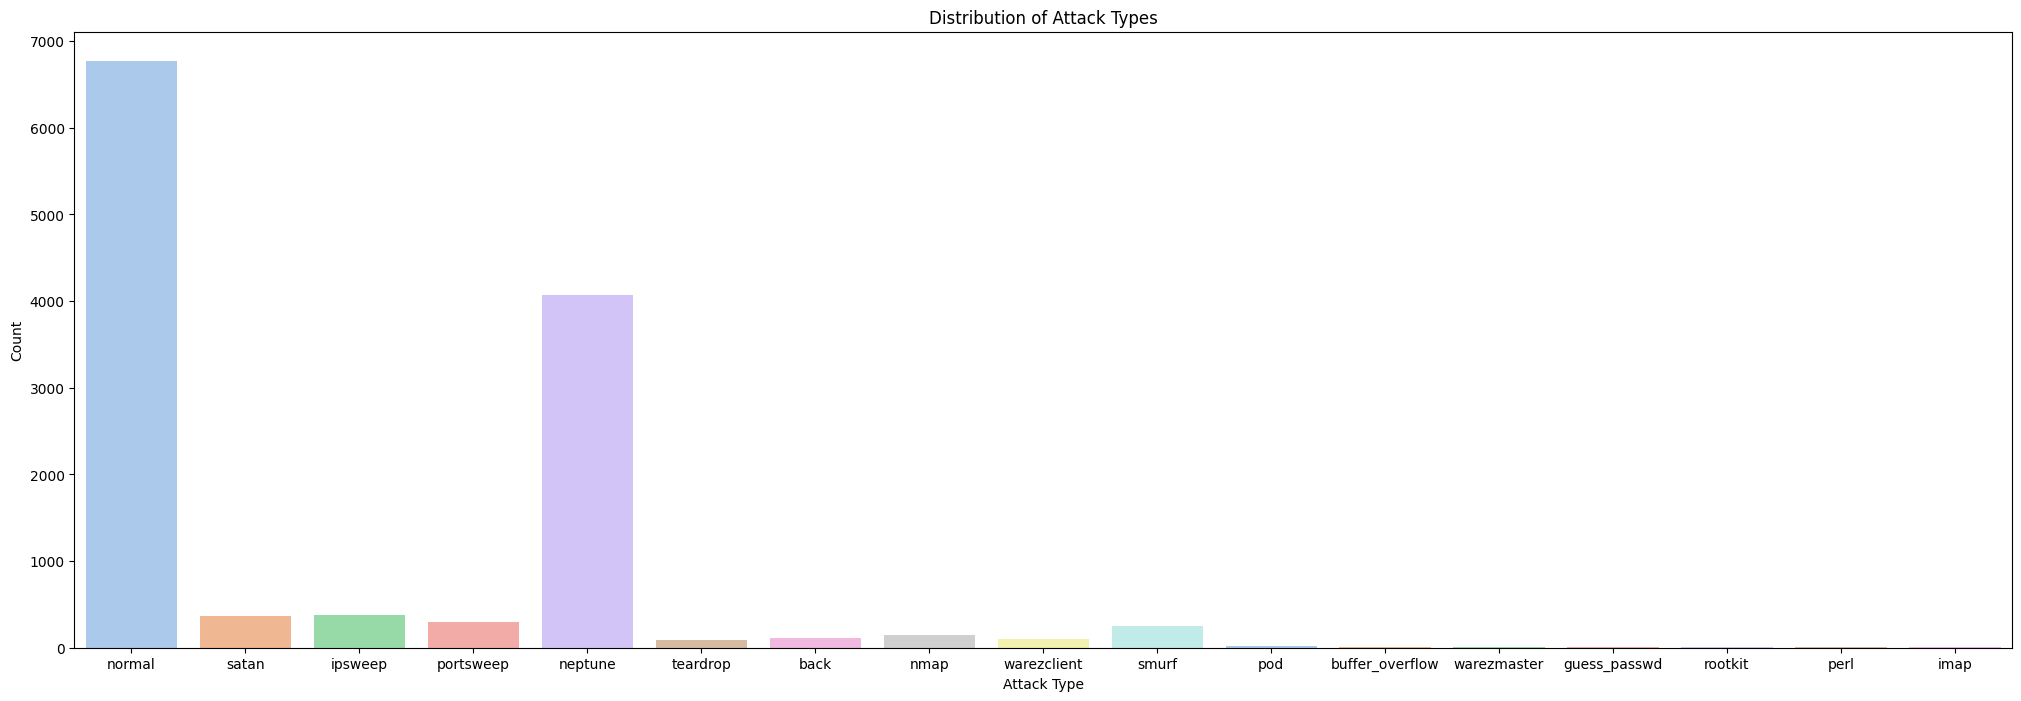

In [ ]:
# Sayım grafiğini oluştur
plt.figure(figsize=(25, 8))
sns.countplot(x=y_pred_string, palette="pastel")

#Etiket ve başlık ekleyin
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Konuyu göster
plt.show()

In [ ]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
count,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,...,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000
mean,287.147,1.053,31.227,6.980,45567.101,19779.271,0.000,0.023,0.000,0.204,...,0.148,0.033,0.284,0.278,0.119,0.120,10.625,19.504,0.465,0.582
std,2604.526,0.427,16.347,2.689,5870354.481,4021285.112,0.014,0.254,0.014,2.150,...,0.309,0.113,0.445,0.446,0.307,0.319,2.636,2.292,0.499,0.725
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,20.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,9.000,18.000,0.000,0.000
50%,0.000,1.000,24.000,9.000,44.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,11.000,20.000,0.000,0.000
75%,0.000,1.000,49.000,9.000,276.000,516.000,0.000,0.000,0.000,0.000,...,0.060,0.020,1.000,1.000,0.000,0.000,11.000,21.000,1.000,1.000
max,42908.000,2.000,69.000,10.000,1379963888.000,1309937401.000,1.000,3.000,3.000,77.000,...,1.000,1.000,1.000,1.000,1.000,1.000,22.000,21.000,1.000,4.000


In [ ]:

# MODELLEME: Çoklu Model Karşılaştırması

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Özellikleri ve hedef değişkeni ayır
X = df.drop("Label", axis=1)  # 'Label' doğru sütun adınızla değiştirilmeli
y = df["Label"]

# Eğitim-test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeller
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM (Linear)": SVC(kernel='linear', probability=True)
}

# Eğitim, tahmin ve değerlendirme
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
